In [4]:
# HELPER

import random
import networkx as nx
import matplotlib.pyplot as plt

# Hàm đọc đồ thị từ file txt
def load_graph_from_txt(filename="graph_coloring.txt"):
    with open(filename, "r", encoding="utf-8") as f:
        lines = [l.strip() for l in f if l.strip()] # Đọc các dòng không rỗng

    n = int(lines[0])
    vertices = lines[1].split()
    adj = [list(map(int, lines[i+2].split())) for i in range(n)] # đọc các dòng ma trận kề

    G = nx.Graph() # Tạo đồ thị NetworkX từ ma trận kề
    for v in vertices: # thêm các đỉnh trong danh sách đỉnh
        G.add_node(v) # Thêm các đỉnh vào đồ thị

    for i in range(n): # thêm các cạnh dựa trên ma trận kề
        for j in range(i + 1, n): # chỉ duyệt nửa trên của ma trận kề vì đây là đồ thị vô hướng
            if adj[i][j] == 1: # nếu có cạnh giữa đỉnh i và j
                G.add_edge(vertices[i], vertices[j]) # Thêm cạnh vào đồ thị

    return G, vertices, adj # Trả về đồ thị, danh sách đỉnh và ma trận kề

# Hàm tạo đồ thị ngẫu nhiên với n đỉnh và bậc tối thiểu cho mỗi đỉnh
def generate_random_graph(n, min_degree=2):
    vertices = [chr(ord('A') + i) for i in range(n)] # Tạo danh sách đỉnh từ 'A' trở đi
    adj = [[0] * n for _ in range(n)] # Khởi tạo ma trận kề với tất cả giá trị là 0

    for i in range(n):#ràng buộc bậc cho mỗi đỉnh >=2
        while sum(adj[i]) < min_degree: # tổng bậc của đỉnh i >= bậc tối thiểu
            j = random.randint(0, n - 1) # chọn ngẫu nhiên đỉnh j
            if i != j and adj[i][j] == 0: #kiểm tra trùng đỉnh và cạnh chưa tồn tại
                adj[i][j] = adj[j][i] = 1 #thêm cạnh giữa đỉnh i và j

    G = nx.Graph()
    for v in vertices:
        G.add_node(v) # Thêm các đỉnh vào đồ thị

    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] == 1:
                G.add_edge(vertices[i], vertices[j]) 
    return G, vertices, adj


def load_colors_from_txt(filename="colors.txt"):
    with open(filename, "r", encoding="utf-8") as f:
        return [c.strip() for c in f if c.strip()]


def print_adjacency_matrix(vertices, adj):
    print("\nMa trận kề đọc được:")
    print("   " + " ".join(vertices))
    for i, v in enumerate(vertices):
        print(f"{v} | " + " ".join(map(str, adj[i])))
    print("-" * 42)

# in đồ thị với đỉnh được tô màu trong từng bước đi
def draw_graph_step(G, color_map, step, current_vertex): #color_map là từ điển màu của đỉnh
    pos = nx.spring_layout(G, seed=42) #vị trí của các đỉnh trong đồ thị 
    #seed = 42 để đảm bảo tính nhất quán của vị trí đỉnh qua các lần vẽ
    node_colors = [color_map.get(v, "lightgray") for v in G.nodes()] # màu đỉnh nếu to màu, nếu chưa tô thì màu xám nhạt

    plt.figure(figsize=(2, 2))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=300,
        edge_color="black"
    )
    plt.title(f"Bước {step}: tô đỉnh {current_vertex}")
    plt.show()


In [5]:
# CORE
# tô màu tham lam với giải thích từng bước đi
def greedy_coloring_step_by_step(G, vertices, adj, colors): 
    # Tính bậc của từng đỉnh và sắp xếp theo bậc giảm dần
    n = len(vertices)
    
    degrees = {vertices[i]: sum(adj[i]) for i in range(n)} # Bậc của từng đỉnh
    order = sorted(vertices, key=lambda v: degrees[v], reverse=True) # Thứ tự duyệt đỉnh theo bậc giảm dần

    print("Bậc từng đỉnh:")
    for v in vertices: # in thứ tự ban đầu
        print(f"  {v}: {degrees[v]}") # in bậc của từng đỉnh
    print("-" * 42)

    print("Thứ tự duyệt:", " → ".join(order))
    print("-" * 42)

    color_map = {}
    step = 1

    for v in order:
        print("-" * 42)
        print(f"Bước {step}: xét đỉnh {v}")

        idx_v = vertices.index(v) # chỉ số đỉnh v trong ma trận kề
        forbidden = set() # tập hợp màu bị cấm
        neighbors_colored = [] # đỉnh kề đã tô màu

        for i in range(n):
            if adj[idx_v][i] == 1:
                u = vertices[i]
                if u in color_map:
                    forbidden.add(color_map[u]) # màu bị cấm
                    neighbors_colored.append(u) # đỉnh kề đã tô màu

        print("  Đỉnh kề đã tô:")
        if neighbors_colored:
            for u in neighbors_colored: # in đỉnh kề đã tô màu
                print(f"    {u}: {color_map[u]}") # in màu của đỉnh kề
        else:
            print("    Không")

        print("  Màu cấm:", list(forbidden) if forbidden else "Không") # in màu bị cấm
        #  chọn màu cho đỉnh v
        chosen_color = None
        for c in colors:
            if c not in forbidden:# tìm màu không bị cấm
                chosen_color = c # chọn màu
                break
        # nếu không tìm được màu
        if chosen_color is None:
            print(f"Không thể tô đỉnh {v} với {len(colors)} màu đã chọn!") # thông báo lỗi không thể tô màu với số màu hiện có
            return None

        color_map[v] = chosen_color
        print(f"  → Gán màu cho {v}: {chosen_color}")
        # gọi hàm draw để vẽ đồ thị sau mỗi bước
        draw_graph_step(G, color_map, step, v)
        step += 1

    print("-" * 42)
    return color_map



--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát

Ma trận kề đọc được:
   A B C D E F G H
A | 0 0 1 1 0 1 1 0
B | 0 0 0 1 1 0 1 1
C | 1 0 0 1 0 1 1 0
D | 1 1 1 0 0 0 0 0
E | 0 1 0 0 0 1 1 0
F | 1 0 1 0 1 0 0 1
G | 1 1 1 0 1 0 0 0
H | 0 1 0 0 0 1 0 0
------------------------------------------

Danh sách màu:
1. red
2. blue
3. green
4. yellow
5. purple
6. orange
→ Màu được sử dụng (3): ['yellow', 'purple', 'blue']
Bậc từng đỉnh:
  A: 4
  B: 4
  C: 4
  D: 3
  E: 3
  F: 4
  G: 4
  H: 2
------------------------------------------
Thứ tự duyệt: A → B → C → F → G → D → E → H
------------------------------------------
------------------------------------------
Bước 1: xét đỉnh A
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho A: yellow


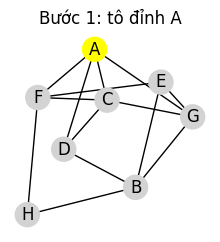

------------------------------------------
Bước 2: xét đỉnh B
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho B: yellow


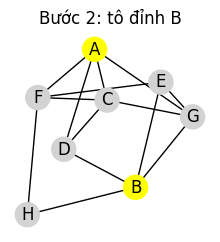

------------------------------------------
Bước 3: xét đỉnh C
  Đỉnh kề đã tô:
    A: yellow
  Màu cấm: ['yellow']
  → Gán màu cho C: purple


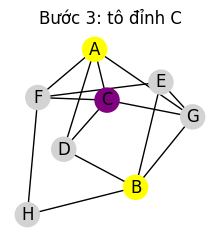

------------------------------------------
Bước 4: xét đỉnh F
  Đỉnh kề đã tô:
    A: yellow
    C: purple
  Màu cấm: ['yellow', 'purple']
  → Gán màu cho F: blue


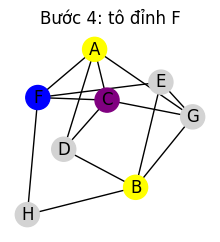

------------------------------------------
Bước 5: xét đỉnh G
  Đỉnh kề đã tô:
    A: yellow
    B: yellow
    C: purple
  Màu cấm: ['yellow', 'purple']
  → Gán màu cho G: blue


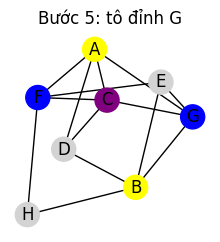

------------------------------------------
Bước 6: xét đỉnh D
  Đỉnh kề đã tô:
    A: yellow
    B: yellow
    C: purple
  Màu cấm: ['yellow', 'purple']
  → Gán màu cho D: blue


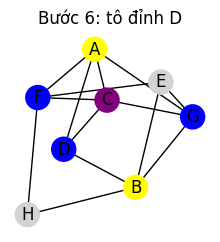

------------------------------------------
Bước 7: xét đỉnh E
  Đỉnh kề đã tô:
    B: yellow
    F: blue
    G: blue
  Màu cấm: ['yellow', 'blue']
  → Gán màu cho E: purple


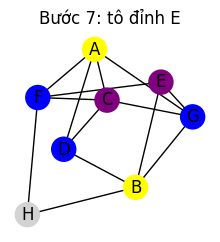

------------------------------------------
Bước 8: xét đỉnh H
  Đỉnh kề đã tô:
    B: yellow
    F: blue
  Màu cấm: ['yellow', 'blue']
  → Gán màu cho H: purple


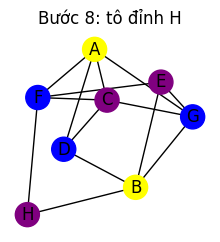

------------------------------------------

KẾT QUẢ CUỐI:
  A: yellow
  B: yellow
  C: purple
  D: blue
  E: purple
  F: blue
  G: blue
  H: purple

--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát

Ma trận kề đọc được:
   A B C D E
A | 0 1 1 1 1
B | 1 0 0 1 0
C | 1 0 0 0 1
D | 1 1 0 0 0
E | 1 0 1 0 0
------------------------------------------

Danh sách màu:
1. red
2. blue
3. green
4. yellow
5. purple
6. orange
→ Màu được sử dụng (2): ['red', 'blue']
Bậc từng đỉnh:
  A: 4
  B: 2
  C: 2
  D: 2
  E: 2
------------------------------------------
Thứ tự duyệt: A → B → C → D → E
------------------------------------------
------------------------------------------
Bước 1: xét đỉnh A
  Đỉnh kề đã tô:
    Không
  Màu cấm: Không
  → Gán màu cho A: red


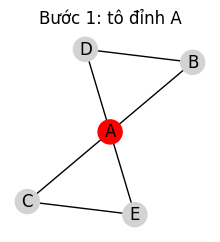

------------------------------------------
Bước 2: xét đỉnh B
  Đỉnh kề đã tô:
    A: red
  Màu cấm: ['red']
  → Gán màu cho B: blue


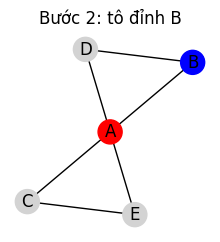

------------------------------------------
Bước 3: xét đỉnh C
  Đỉnh kề đã tô:
    A: red
  Màu cấm: ['red']
  → Gán màu cho C: blue


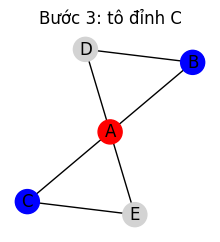

------------------------------------------
Bước 4: xét đỉnh D
  Đỉnh kề đã tô:
    A: red
    B: blue
  Màu cấm: ['red', 'blue']
Không thể tô đỉnh D với 2 màu đã chọn!

--- TÔ MÀU ĐỒ THỊ ---
1. Load từ file graph.txt
2. Random đồ thị
0. Thoát


In [6]:
# =========================
# MAIN
# =========================

def main():
    while True:
        print("\n--- TÔ MÀU ĐỒ THỊ ---")
        print("1. Load từ file graph.txt")
        print("2. Random đồ thị")
        print("0. Thoát")
        choice = input("Chọn (0/1/2): ")

        if choice == "0":
            break

        elif choice == "1":
            G, vertices, adj = load_graph_from_txt("graph_coloring.txt") # Load đồ thị từ file

        elif choice == "2":
            while True:
                n = input("Nhập số đỉnh (n >= 3): ")
                if n.isdigit() and int(n) >= 3:
                    n = int(n)
                    break
                print("Nhập sai!")

            G, vertices, adj = generate_random_graph(n, min_degree=2) # Tạo đồ thị ngẫu nhiên với ràng buộc bậc tối thiểu

        else:
            print("Lựa chọn không hợp lệ!")
            continue

        print_adjacency_matrix(vertices, adj)

        # ===== LOAD MÀU =====
        all_colors = load_colors_from_txt("colors.txt")

        print("\nDanh sách màu:")
        for i, c in enumerate(all_colors, start=1):
            print(f"{i}. {c}")

        # ===== CHỌN MÀU THEO CHỈ SỐ =====
        while True:
            raw = input("\nNhập các chỉ số màu (vd: 1 3 4): ").strip()
            try:
                indices = list(map(int, raw.split()))
                if not indices:
                    raise ValueError

                if any(i < 1 or i > len(all_colors) for i in indices):
                    raise ValueError

                # loại trùng & giữ thứ tự
                indices = list(dict.fromkeys(indices))
                colors = [all_colors[i - 1] for i in indices]
                break
            except:
                print("Nhập sai! Vui lòng nhập dạng: 1 3 4")

        print(f"→ Màu được sử dụng ({len(colors)}):", colors)

        # ===== TÔ MÀU =====
        # thực hiện tô màu tham lam với giải thích từng bước đi
        result = greedy_coloring_step_by_step(G, vertices, adj, colors)

        if result:
            print("\nKẾT QUẢ CUỐI:")
            for v in vertices:
                print(f"  {v}: {result[v]}")

        input("\nNhấn Enter để quay lại menu...")


if __name__ == "__main__":
    main()
